In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import os
import statsmodels.api as sm
from tensorflow.keras.regularizers import l2
import random
import tensorflow as tf

In [3]:
file_path = 'C:/Users/zz/Desktop/projectfinal/masterdata/'
os.chdir(file_path)
data = pd.read_csv('exdata.csv')
index = pd.read_csv('Index.csv')

In [4]:
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')
index['Date'] = pd.to_datetime(index['Date'])
index = index.set_index('Date')

In [5]:
ree=index[['returns']]

In [6]:
data=pd.merge(data,ree,on='Date', how='inner')

In [7]:
data=data.sort_index()

In [8]:
random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

Epoch 1/50


C:\Users\zz\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - loss: 0.5708 - mean_absolute_error: 0.5799 - val_loss: 0.4229 - val_mean_absolute_error: 0.4975
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5622 - mean_absolute_error: 0.5774 - val_loss: 0.4298 - val_mean_absolute_error: 0.4987
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5620 - mean_absolute_error: 0.5791 - val_loss: 0.4278 - val_mean_absolute_error: 0.4976
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5592 - mean_absolute_error: 0.5768 - val_loss: 0.4243 - val_mean_absolute_error: 0.4963
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5578 - mean_absolute_error: 0.5755 - val_loss: 0.4261 - val_mean_absolute_error: 0.4960
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5569 - mean_absolute_error: 0.5738 - val_loss: 0.4296 - val_mean_absolute_error: 0.4957
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5632 - mean_absolute_error: 0.5781 - val_loss: 0.4315 - val_mean_absolu

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5172 - mean_absolute_error: 0.5634 - val_loss: 0.3523 - val_mean_absolute_error: 0.4692
Epoch 47/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5235 - mean_absolute_error: 0.5685 - val_loss: 0.3416 - val_mean_absolute_error: 0.4629
Epoch 48/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5035 - mean_absolute_error: 0.5637 - val_loss: 0.3351 - val_mean_absolute_error: 0.4586
Epoch 49/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5056 - mean_absolute_error: 0.5538 - val_loss: 0.3666 - val_mean_absolute_error: 0.4754
Epoch 50/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5048 - mean_absolute_error: 0.5598 - val_loss: 0.3296 - val_mean_absolute_error: 0.4569


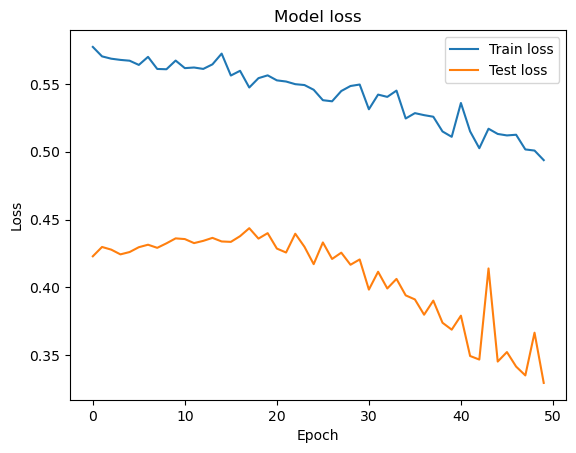

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


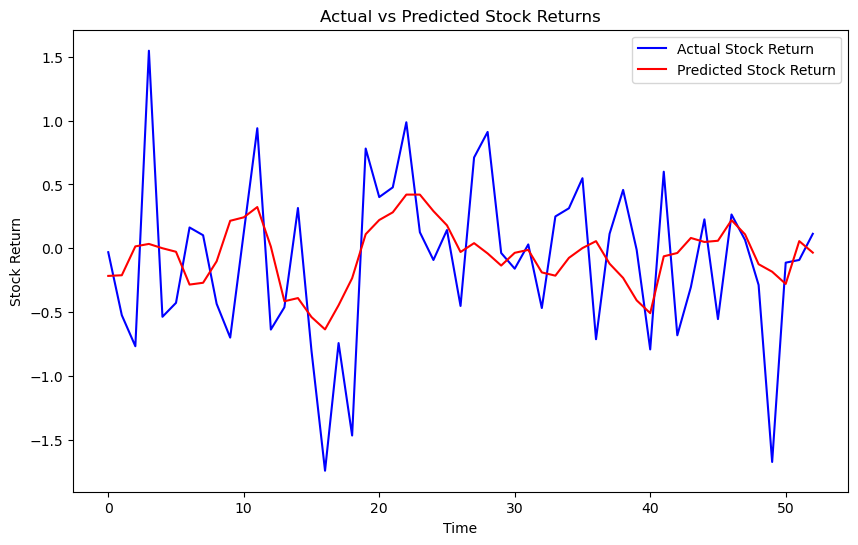

In [9]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, LayerNormalization
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping


# Select features target
features = data.values
# features = data['returns'].values.reshape(-1, 1)

target = data['returns'].values

# Normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
features_scaled = scaler.fit_transform(features)

# Create sequences of 7 time steps
def create_sequences(X, y, time_steps):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps ])
    return np.array(Xs), np.array(ys)

time_steps = 7
X, y = create_sequences(features_scaled, target, time_steps)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# early_stop = EarlyStopping(
#     monitor='val_loss',  # 监控验证集的损失
#     patience=100,         # 如果10个epoch内验证损失没有改善，停止训练
#     restore_best_weights=True  # 恢复验证集表现最好的模型
# )

# Build LSTM model
model = Sequential()
model.add(LSTM(units=90, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(LayerNormalization())
model.add(Dropout(0.2))
# model.add(LSTM(units=90, return_sequences=True))
# model.add(Dropout(0.2))          
model.add(LSTM(units=90))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model and display accuracy after each epoch
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), verbose=1)

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

predicted_stock_returns = model.predict(X_test)

# Plot actual vs predicted returns
plt.figure(figsize=(10,6))
plt.plot(y_test, color='blue', label='Actual Stock Return')
plt.plot(predicted_stock_returns, color='red', label='Predicted Stock Return')
plt.title('Actual vs Predicted Stock Returns')
plt.xlabel('Time')
plt.ylabel('Stock Return')
plt.legend()
plt.show()

In [10]:
# model.summary()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


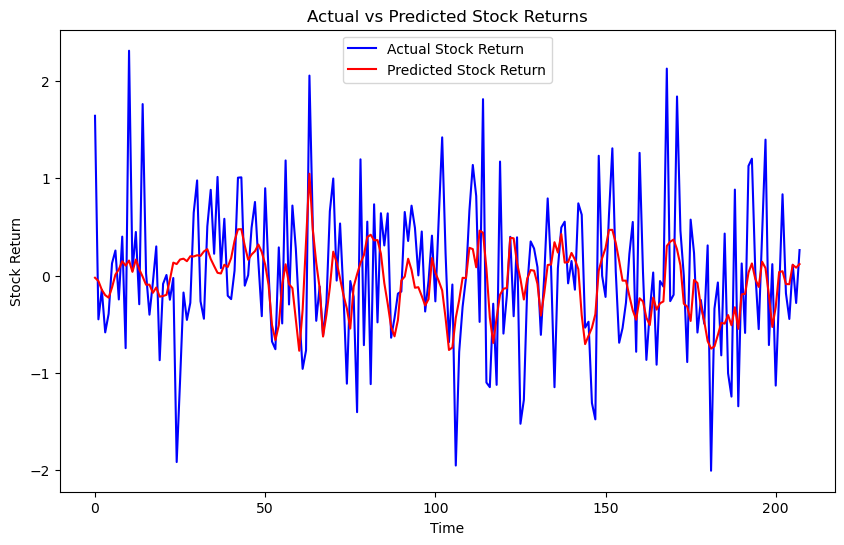

In [11]:
plt.figure(figsize=(10,6))
plt.plot(y_train, color='blue', label='Actual Stock Return')
plt.plot(model.predict(X_train), color='red', label='Predicted Stock Return')
plt.title('Actual vs Predicted Stock Returns')
plt.xlabel('Time')
plt.ylabel('Stock Return')
plt.legend()
plt.show()

In [14]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# 使用指数平滑
model1 = SimpleExpSmoothing(y_test).fit(smoothing_level=0.3, optimized=False)
y_testp=model1.fittedvalues

model2 = SimpleExpSmoothing(predicted_stock_returns).fit(smoothing_level=0.5, optimized=False)
predicted_stock_returnsp=model2.fittedvalues

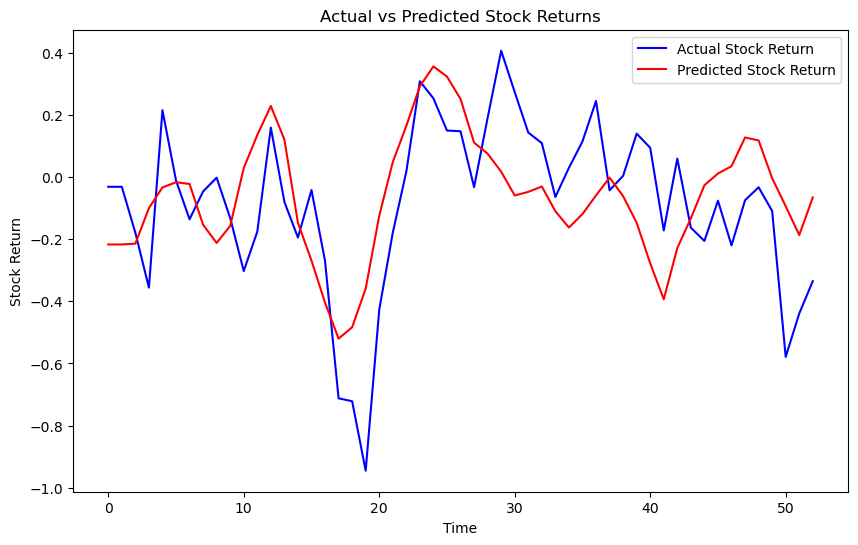

In [15]:
plt.figure(figsize=(10,6))
plt.plot(y_testp, color='blue', label='Actual Stock Return')
plt.plot(predicted_stock_returnsp, color='red', label='Predicted Stock Return')
plt.title('Actual vs Predicted Stock Returns')
plt.xlabel('Time')
plt.ylabel('Stock Return')
plt.legend()
plt.show()

In [16]:
u=np.reshape(model.predict(X_test), (1,len(model.predict(X_test))))[0]>0
v=y_test>0
v=v[0:30]
u=u[0:30]
u==v
sum(u==v)/len(u)
# 准确率

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


0.7333333333333333

In [17]:
u=np.reshape(model.predict(X_test), (1,len(model.predict(X_test))))[0]
v=y_test
v=v[0:30]
u=u[0:30]
re=[]
for i in range(0,len(u)):
    if u[i]>0.3:
        re.append(y_test[i]-0.2)
    else: re.append(0)
rl=[1]
for i in range(0,len(re)):
    rl.append(rl[i]*(1+re[i]/100))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [18]:
u=np.reshape(model.predict(X_test), (1,len(model.predict(X_test))))[0]
v=y_test
v=v[0:30]
u=u[0:30]
re=[]
for i in range(0,len(u)):
    if u[i]>0.3:
        re.append(y_test[i]-0.2)
    elif u[i]<-0.3:
        re.append(-y_test[i]-0.2)
    else: re.append(0)
rs=[1]
for i in range(0,len(re)):
    rs.append(rs[i]*(1+re[i]/100))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [19]:
print((rl[-1]-1)*240/30)
print((rs[-1]-1)*240/30)

0.1165097093842089
0.31539633589544636


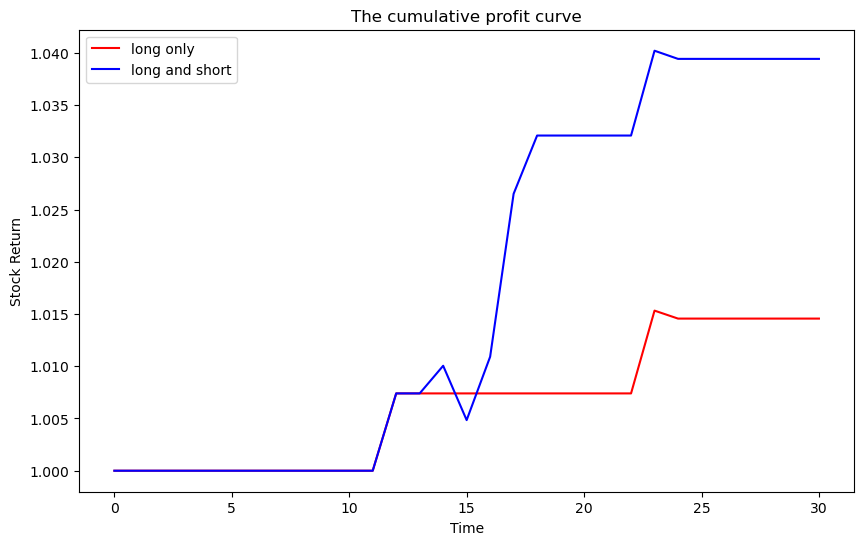

In [20]:
plt.figure(figsize=(10,6))
plt.plot(rl, color='red', label='long only')
plt.plot(rs, color='blue', label='long and short')
plt.title('The cumulative profit curve')
plt.xlabel('Time')
plt.ylabel('Stock Return')
plt.legend()
plt.show()

In [21]:
u=np.reshape(model.predict(X_test), (1,len(model.predict(X_test))))[0]>0
v=y_test>0
v=v[0:30]
u=u[0:30]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [22]:
tp=0
for i in range(0,len(u)):
    if u[i]==v[i]==1:
        tp=tp+1
print(tp)

10


In [23]:
tn=0
for i in range(0,len(u)):
    if u[i]==v[i]==0:
        tn=tn+1
print(tn)

12


In [24]:
fn=0
for i in range(0,len(u)):
    if u[i]==0 and v[i]==1:
        fn=fn+1
print(fn)

4


In [25]:
fp=0
for i in range(0,len(u)):
    if u[i]==1 and v[i]==0:
        fp=fp+1
print(fp)

4
